In [1]:
#importing necessary libraries to handle and visualize data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#for building, training and validating the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

In [3]:
#importing dataset
df = pd.read_csv("Hitters.csv")
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
Unnamed: 0    322 non-null object
AtBat         322 non-null int64
Hits          322 non-null int64
HmRun         322 non-null int64
Runs          322 non-null int64
RBI           322 non-null int64
Walks         322 non-null int64
Years         322 non-null int64
CAtBat        322 non-null int64
CHits         322 non-null int64
CHmRun        322 non-null int64
CRuns         322 non-null int64
CRBI          322 non-null int64
CWalks        322 non-null int64
League        322 non-null object
Division      322 non-null object
PutOuts       322 non-null int64
Assists       322 non-null int64
Errors        322 non-null int64
Salary        263 non-null float64
NewLeague     322 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 52.9+ KB


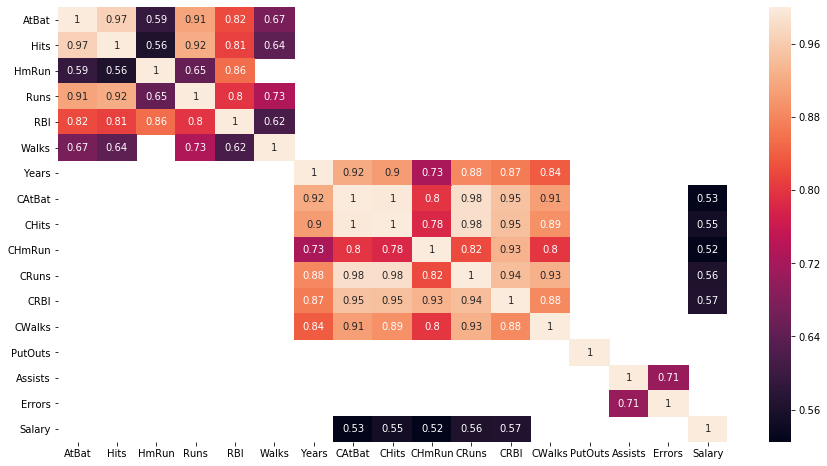

In [5]:
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr[(corr>0.5)|(corr<-0.5)],annot=True)
plt.show()

#### Seperating training and testing dataset

In [6]:
train = df.dropna()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


In [8]:
test = df[df.Salary.isna()]

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 316
Data columns (total 21 columns):
Unnamed: 0    59 non-null object
AtBat         59 non-null int64
Hits          59 non-null int64
HmRun         59 non-null int64
Runs          59 non-null int64
RBI           59 non-null int64
Walks         59 non-null int64
Years         59 non-null int64
CAtBat        59 non-null int64
CHits         59 non-null int64
CHmRun        59 non-null int64
CRuns         59 non-null int64
CRBI          59 non-null int64
CWalks        59 non-null int64
League        59 non-null object
Division      59 non-null object
PutOuts       59 non-null int64
Assists       59 non-null int64
Errors        59 non-null int64
Salary        0 non-null float64
NewLeague     59 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 10.1+ KB


In [10]:
test.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
15,-Billy Beane,183,39,3,20,15,11,3,201,42,...,20,16,11,A,W,118,0,0,NaN,A
18,-Bruce Bochte,407,104,6,57,43,65,12,5233,1478,...,643,658,653,A,W,912,88,9,NaN,A
22,-Bob Boone,22,10,1,4,2,1,6,84,26,...,9,9,3,A,W,812,84,11,NaN,A
30,-Bobby Grich,313,84,9,42,30,39,17,6890,1833,...,1033,864,1087,A,W,127,221,7,NaN,A


In [11]:
test.drop('Salary',axis=1,inplace = True)

C:\Users\No_ob0dy\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### EDA and Data Preprocessing

In [12]:
target = train[['Salary']]
train.drop('Salary',axis=1,inplace=True)

In [13]:
train.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,A


In [14]:
#we can drop the name of the players
train.drop('Unnamed: 0',axis=1,inplace =True)

In [15]:
#seperating categorical and numerical values 
cat_cols = [cols for cols in train.columns.values if (train[cols].dtype=='object')]
x_cat = train[cat_cols]
x_num = train.drop(cat_cols, axis=1)

In [16]:
x_cat.head()

,League,Division,NewLeague
1,N,W,N
2,A,W,A
3,N,E,N
4,N,E,N
5,A,W,A


In [17]:
x_num.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


##### Working on numerical data

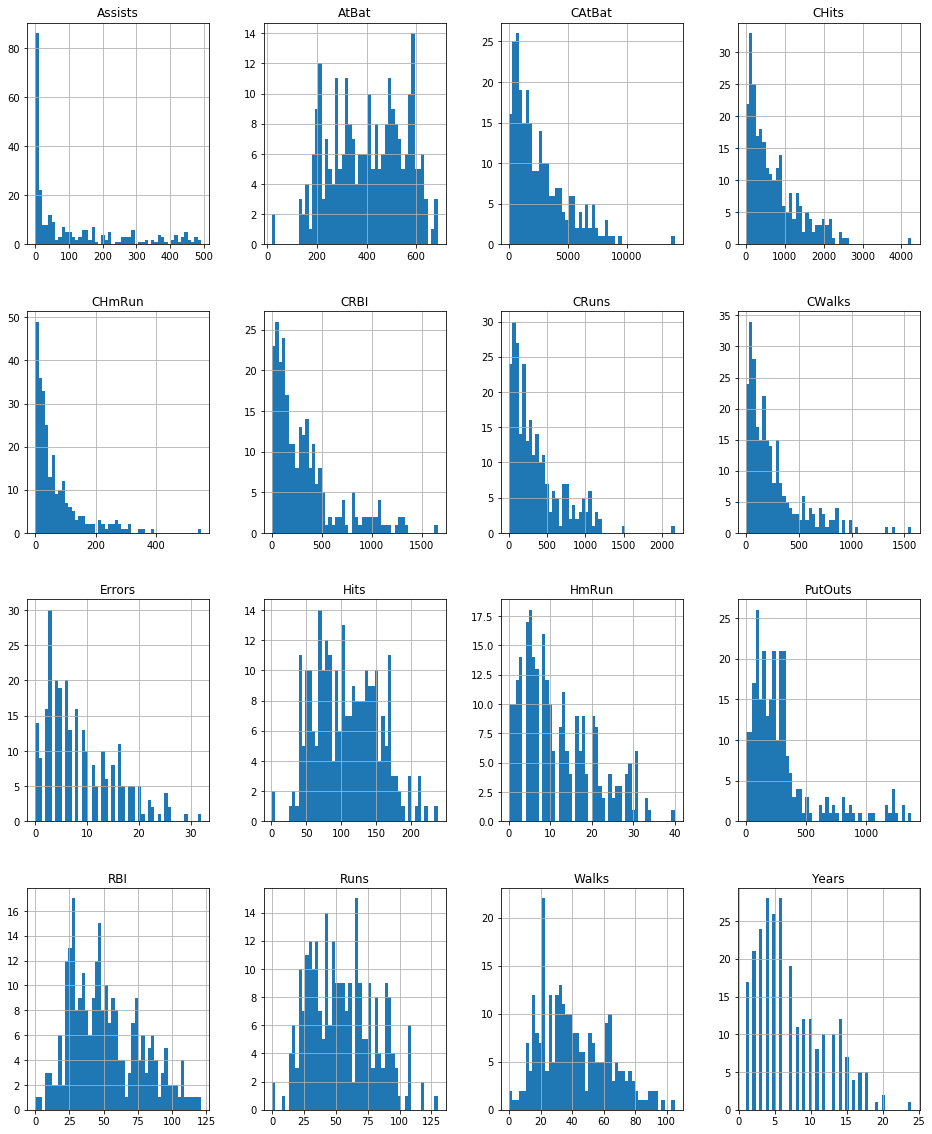

In [18]:
x_num.hist(figsize=(16,20),bins = 50)
plt.show()

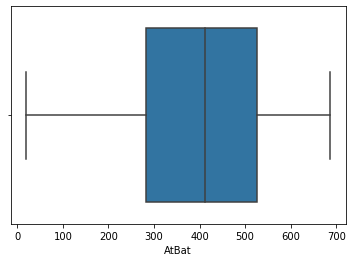

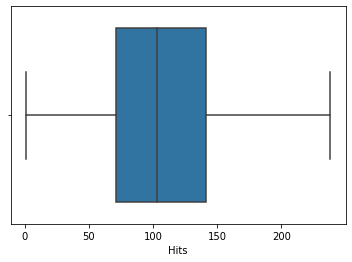

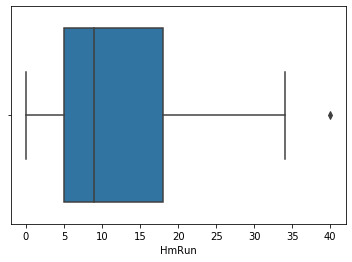

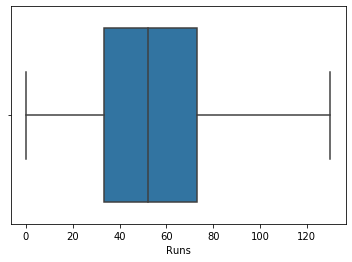

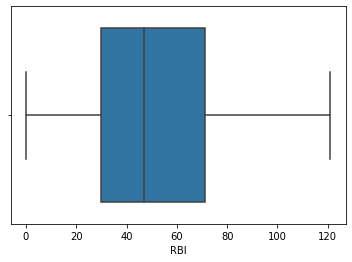

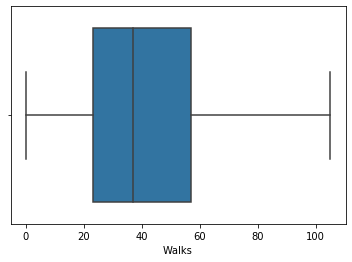

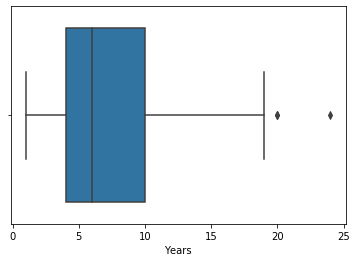

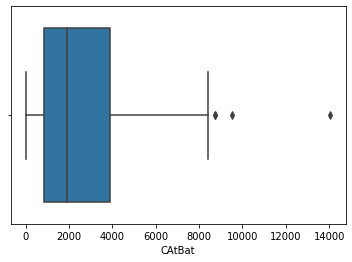

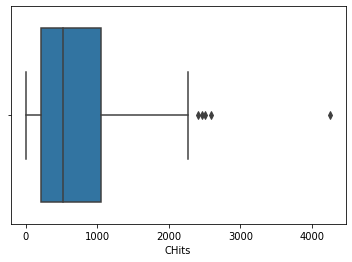

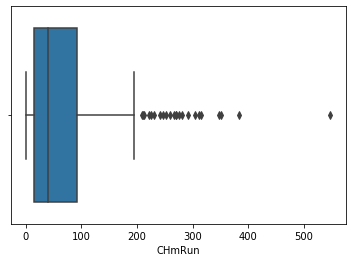

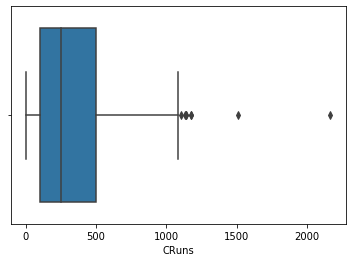

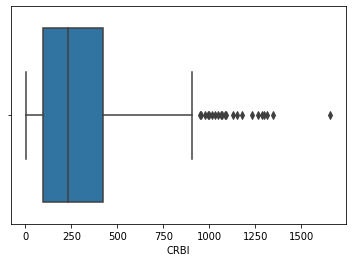

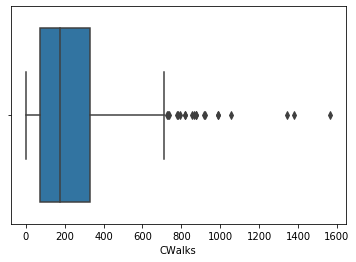

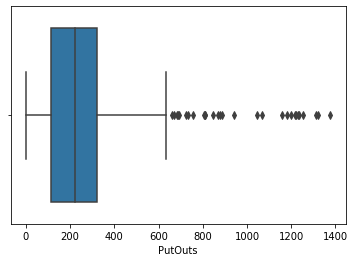

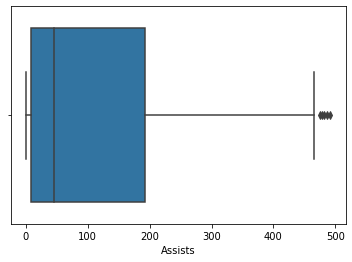

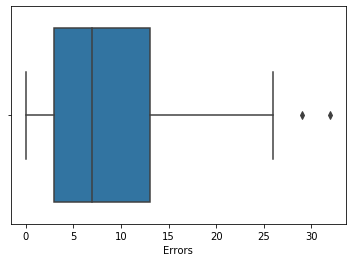

In [19]:
# checking for outliers
for i in x_num.columns.values:
    sns.boxplot(x_num[i])
    plt.show()

In [20]:
x_num.skew()

AtBat     -0.147623
Hits       0.241947
HmRun      0.794957
Runs       0.352831
RBI        0.561924
Walks      0.539639
Years      0.809867
CAtBat     1.317012
CHits      1.459543
CHmRun     2.197967
CRuns      1.523220
CRBI       1.531237
CWalks     1.860274
PutOuts    2.078838
Assists    1.175297
Errors     0.951468
dtype: float64

In [21]:
#func to remove outliers
def rm_out(df):
    for i,val in df.iteritems():
        u_thres = df[i].quantile(q=0.75)+1.5*(df[i].quantile(q=0.75)-df[i].quantile(q=0.25))
        l_thres = df[i].quantile(q=0.25)-1.5*(df[i].quantile(q=0.75)-df[i].quantile(q=0.25))
        df[i] = df[(df[i]>=l_thres) & (df[i]<=u_thres)][i]

In [22]:
x_num1 = x_num.copy()

In [23]:
rm_out(x_num1)

In [24]:
x_num1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 16 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      262 non-null float64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      260 non-null float64
CAtBat     259 non-null float64
CHits      258 non-null float64
CHmRun     240 non-null float64
CRuns      255 non-null float64
CRBI       241 non-null float64
CWalks     243 non-null float64
PutOuts    234 non-null float64
Assists    258 non-null float64
Errors     261 non-null float64
dtypes: float64(11), int64(5)
memory usage: 34.9 KB


In [25]:
for (colname, colvalues) in x_num1.iteritems():
    if x_num1[colname].isnull().sum() > (.3*x_num1.shape[0]):
        x_num1.drop([colname],inplace=True,axis=1)
    else:
        x_num1[colname].fillna(x_num1[colname].mean(),inplace=True)

In [26]:
skew = x_num1.skew()
skew = skew[skew>0.5]
skew

HmRun      0.744413
RBI        0.561924
Walks      0.539639
Years      0.699903
CAtBat     0.978187
CHits      0.994807
CHmRun     1.228756
CRuns      1.064329
CRBI       1.155424
CWalks     1.195112
PutOuts    0.639153
Assists    1.216741
Errors     0.842434
dtype: float64

In [27]:
x_num1[skew.index] = np.sqrt(x_num1[skew.index])
x_num1.skew()

AtBat     -0.147623
Hits       0.241947
HmRun     -0.110192
Runs       0.352831
RBI       -0.114353
Walks     -0.144738
Years      0.141342
CAtBat     0.309022
CHits      0.316010
CHmRun     0.272834
CRuns      0.350973
CRBI       0.273942
CWalks     0.352943
PutOuts   -0.709340
Assists    0.560669
Errors    -0.148002
dtype: float64

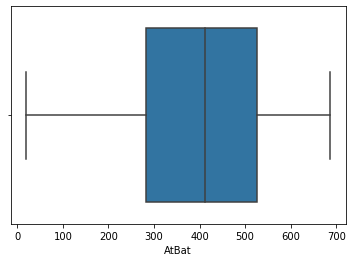

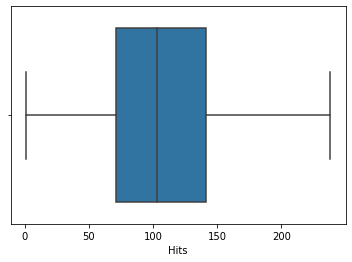

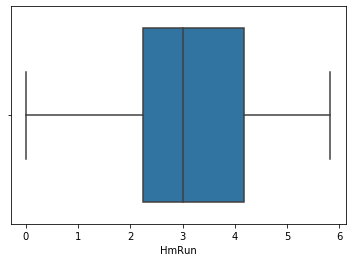

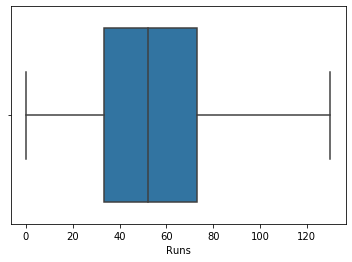

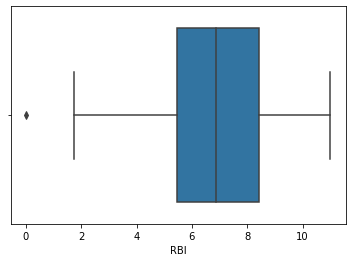

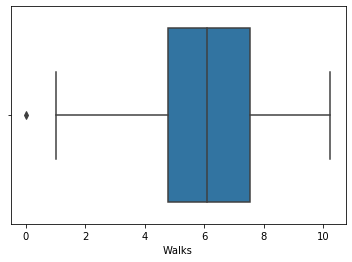

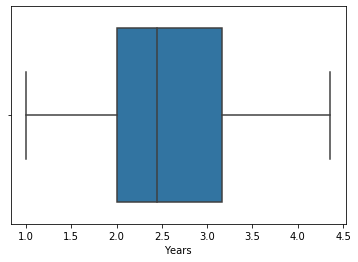

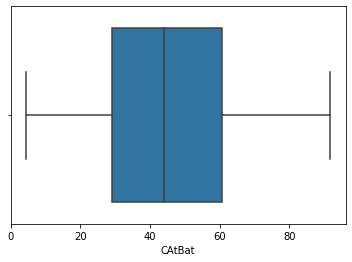

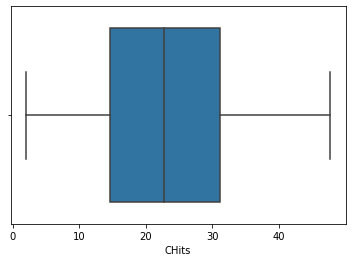

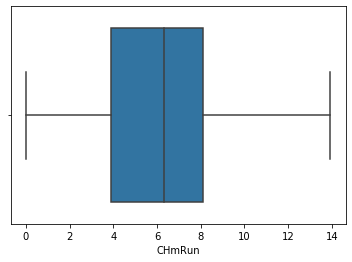

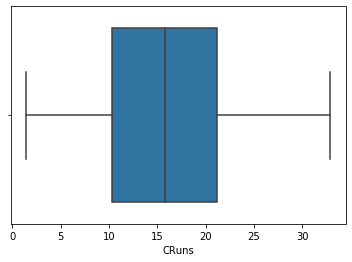

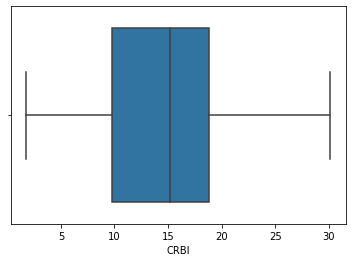

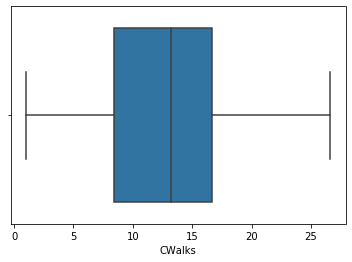

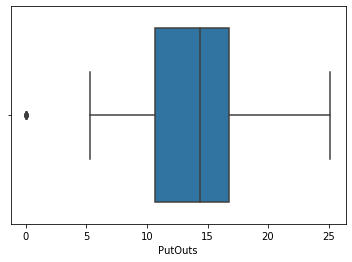

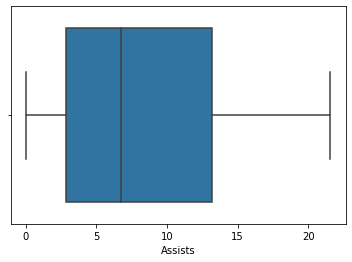

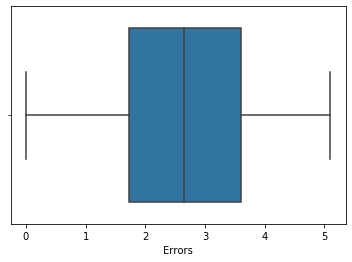

In [28]:
# checking for outliers
for i in x_num1.columns.values:
    sns.boxplot(x_num1[i])
    plt.show()

In [29]:
# Normalizing the data
x_num1 = (x_num1 - x_num1.mean())/x_num1.std()

In [30]:
#dummy encoding for categorical values
x_cat_dummies = pd.get_dummies(x_cat,drop_first=True)

In [31]:
#concatenating both categorical and numerical values
train1 = pd.concat([x_num1,x_cat_dummies],axis=1)
train1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,-0.601753,-0.594542,-0.338774,-1.203816,-0.411238,0.045079,1.402478,0.618185,0.474712,0.661176,0.180018,0.887908,1.094808,2.444472,-0.282744,0.431621,1,1,1
2,0.511566,0.491323,0.832079,0.440675,0.834773,1.446603,-0.926395,-0.281671,-0.214549,0.542761,-0.209037,0.254539,0.544640,0.169357,0.104487,0.922918,0,1,0
3,0.626971,0.735088,1.000347,0.401520,1.020789,-0.046872,0.909920,1.413672,1.463838,0.235026,1.612148,2.237202,0.998670,0.125554,-0.785135,-0.781170,1,0,1
4,-0.561022,-0.461579,0.039947,-0.616498,-0.241411,-0.390076,-1.294727,-1.277709,-1.252974,-0.891277,-1.269226,-1.240008,-1.285855,0.169357,-0.318846,-0.553957,1,0,1
5,1.292248,1.355583,-0.812245,0.753911,0.113295,-0.141344,0.909920,0.992427,0.911407,-0.604416,0.769112,0.571546,0.144572,0.684482,1.881466,1.989956,0,1,0


In [32]:
target = np.log1p(target)

In [33]:
target.head()

,Salary
1,6.165418
2,6.175867
3,6.216606
4,4.527209
5,6.621406


In [34]:
target.kurt()

Salary   -0.884881
dtype: float64

#### Model Training and Validation

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(train1,target,test_size=0.30,random_state=1)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)

X_train (184, 19)
X_test (79, 19)
Y_train (184, 1)
Y_test (79, 1)


##### First Model with Ridge Regression

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
reg = Ridge()
params = [{'alpha':np.linspace(1,500,num=1000)}]
grid_search = GridSearchCV(estimator=reg, param_grid=params,cv = 10, verbose = 1)
grid_search = grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:  1.1min finished
C:\Users\No_ob0dy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
grid_search.best_params_

{'alpha': 96.4044044044044}

In [39]:
reg1 = Ridge(alpha=96.4044)
model1= reg1.fit(X_train,Y_train)

In [40]:
y_pred = model1.predict(X_test)
print("Mean Squared Error:",mean_squared_error(Y_test,y_pred))

Mean Squared Error: 0.31355150725984465


##### Second Model with Lasso Regression

In [41]:
lasso =Lasso()
params = [{'alpha':np.linspace(1,500,num=1000)}]
grid_search1 = GridSearchCV(estimator=lasso, param_grid=params,cv = 10, verbose = 1)
grid_search1 = grid_search1.fit(X_train,Y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   58.5s finished
C:\Users\No_ob0dy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [42]:
grid_search1.best_params_

{'alpha': 1.0}

In [43]:
lasso1 = Lasso(alpha=1.0)
model2 = lasso1.fit(X_train,Y_train)

In [44]:
y_pred2 = model2.predict(X_test)
print("Mean Squared Error:",mean_squared_error(Y_test,y_pred2))

Mean Squared Error: 0.7804149617677167
